In [1]:
import baseline

In [2]:
training_data, training_labels = baseline.load_data('/Users/hsr/Documents/NNLP/data_en_es/en_es.slam.20171218.train')

Loading instances...
Loaded 317049 instances across 100000 exercises...
Loaded 635368 instances across 200000 exercises...
Loaded 951536 instances across 300000 exercises...
Loaded 1271940 instances across 400000 exercises...
Loaded 1591345 instances across 500000 exercises...
Loaded 1911213 instances across 600000 exercises...
Loaded 2227445 instances across 700000 exercises...
Loaded 2546705 instances across 800000 exercises...
Done loading 2622958 instances across 824012 exercises.



In [3]:
format_type = {'reverse_translate':0, 'listen':0,'reverse_tap':0}
users = {}
vocab = {}
session = {'practice':0, 'lesson':0, 'test':0}

In [4]:
len_train_labels = len(training_labels)
for i in range(len_train_labels):
#     import pdb ;pdb.set_trace()
    InstanceDataObj = training_data[i]
    format_type[InstanceDataObj.format] += 1
    if InstanceDataObj.user in users:
        users[InstanceDataObj.user] += 1
    else:
        users[InstanceDataObj.user] = 1
#     import pdb; pdb.set_trace()
    if InstanceDataObj.token in vocab:
        vocab[InstanceDataObj.token] += 1
    else:
        vocab[InstanceDataObj.token] = 1
    session[InstanceDataObj.session] += 1
    

In [5]:
print("Number of unique users: ", len(users.items()))
print("Number of unique vocab: ", len(vocab.items()))
print("Number of session users: ", len(session.items()))
print("Number of Format users: ", len(format_type.items()))

('Number of unique users: ', 2593)
('Number of unique vocab: ', 2226)
('Number of session users: ', 3)
('Number of Format users: ', 3)


In [6]:
def plot(d):
    import matplotlib.pylab as plt
    lists = sorted(d.items()) # sorted by key, return a list of tuples
    x, y = zip(*lists) # unpack a list of pairs into two tuples
    plt.plot(x, y)
    plt.show()

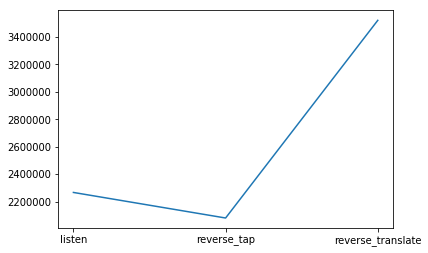

In [38]:
plot(format_type)

In [43]:
top_users = sorted(users.iteritems(), key=lambda (k,v): (v,k), reverse=True)[:10]

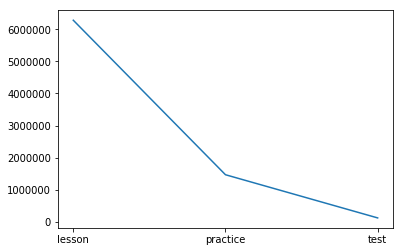

In [46]:
plot(session)

In [49]:
# plt.hist(users.values(), bins='auto') 


KeyboardInterrupt



In [41]:
import matplotlib.pylab as plt
res = plt.hist(users.values(), bins='auto') 

(array([   8.,   26.,   67.,  190.,  250.,  254.,  234.,  249.,  209.,
        180.,  146.,  109.,   86.,   79.,   79.,   59.,   46.,   41.,
         35.,   43.,   19.,   21.,   21.,   20.,   12.,    5.,   16.,
         14.,   12.,   10.,    4.,    5.,    4.,    8.,    2.,    4.,
          2.,    1.,    2.,    3.,    0.,    2.,    1.,    1.,    1.,
          1.,    0.,    1.,    0.,    3.,    1.,    0.,    2.,    2.,
          1.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          0.,    0.,    0.,    0.,    0.,    0.,    1.]), array([  103.        ,   193.62886598,   284.25773196,   374.88659794,
         465.51546392,   556.1443299 ,   646.77319588,   737.40206186,
         828.03092784,   918.65979381,  1009.28865979,  1099.91752577,
        1190.54639175,  1281

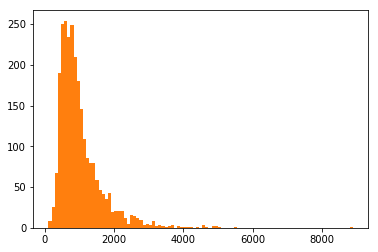

In [42]:
print res
plt.show()

In [47]:
pos_tags = []

len_train_labels = len(training_labels)

for i in range(len_train_labels):
    InstanceDataObj = training_data[i]
    if InstanceDataObj.part_of_speech in pos_tags:
        continue
    else:
        pos_tags.append(InstanceDataObj.part_of_speech)    

In [117]:
country_pos = {}
all_pos_tags_dict = {}
for i in pos_tags:
    country_pos[i] = {}
    all_pos_tags_dict[i] = 0

In [118]:
for i in range(len_train_labels):
    InstanceDataObj = training_data[i]
    pos = InstanceDataObj.part_of_speech
    #checking mistakes only
    if training_labels[InstanceDataObj.instance_id] == 1:
        if str(InstanceDataObj.countries[0]) in country_pos[pos]:
            country_pos[pos][InstanceDataObj.countries[0]] += 1
        else:
            country_pos[pos][InstanceDataObj.countries[0]] = 1
    

In [120]:
#all country pos tag mistakes
all_country_mistakes = {}
for pos in all_pos_tags_dict:
    print(pos)
    for country in country_pos[pos]:
        all_pos_tags_dict[pos] += country_pos[pos][country]
# print all_pos_tags_dict
# print all_country_mistakes
# plot(all_country_mistakes)
#country wise pos tags mistakes
# plot(country_pos)

ADV
NOUN
NUM
ADP
PUNCT
SCONJ
PROPN
DET
INTJ
PART
PRON
VERB
X
AUX
CONJ
ADJ


In [115]:
all_pos_tags_dict

{u'ADJ': {u'AD': 13,
  u'AR': 936,
  u'AU': 10,
  u'BO': 157,
  u'BR': 15,
  u'CA': 44,
  u'CH': 27,
  u'CL': 876,
  u'CO': 3966,
  u'CR': 386,
  u'CU': 49,
  u'DE': 35,
  u'DK': 14,
  u'DO': 997,
  u'EC': 278,
  u'ES': 4600,
  u'FR': 21,
  u'GB': 28,
  u'GT': 467,
  u'HN': 328,
  u'IL': 16,
  u'IT': 25,
  u'JP': 17,
  u'MX': 11479,
  u'NI': 165,
  u'NZ': 39,
  u'PA': 117,
  u'PE': 531,
  u'PR': 137,
  u'PT': 1,
  u'PY': 253,
  u'SV': 256,
  u'US': 5058,
  u'UY': 81,
  u'VE': 1064,
  u'undefined': 13},
 u'ADP': {u'AD': 2,
  u'AR': 450,
  u'AU': 3,
  u'BO': 72,
  u'BR': 8,
  u'CA': 23,
  u'CH': 10,
  u'CL': 331,
  u'CO': 1688,
  u'CR': 164,
  u'CU': 24,
  u'DE': 26,
  u'DK': 2,
  u'DO': 417,
  u'EC': 154,
  u'ES': 2242,
  u'FR': 11,
  u'GB': 16,
  u'GT': 215,
  u'HN': 141,
  u'IL': 41,
  u'IT': 11,
  u'JP': 3,
  u'MX': 4994,
  u'NI': 58,
  u'NZ': 9,
  u'PA': 38,
  u'PE': 285,
  u'PR': 47,
  u'PT': 1,
  u'PY': 113,
  u'SV': 113,
  u'US': 2195,
  u'UY': 54,
  u'VE': 621,
  u'undefined': 2